Numerical Columns => Age, TRESTBPS,CHOL, THALACH, OLDPEAK

Cathegorical Columns => FPS, Sex, CP, RESTECH, EXANG, SLOPE, CA, THAL 

TARGET (0 = no disease; 1 = heart disease)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing 

In [2]:
heart = pd.read_csv(r'C:\Users\ShahabiD\Documents\Fianl Project CoderGirl\heart.csv')

In [3]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
#Check Missing Data
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The . describe() shows there is no missing data or at least all the columns have entered values and also it seems all data are numerical data.

In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


=> We know some of our data are categolical data, but .info() shows almost all of the values are int64. we need to change them into categorical type.

In [7]:
# to change the data type of categorical values from int64 to categorical

cat_var = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', "target"]
for var in cat_var:
    heart[var] = heart[var].astype('category')

heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null category
cp          303 non-null category
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null category
restecg     303 non-null category
thalach     303 non-null int64
exang       303 non-null category
oldpeak     303 non-null float64
slope       303 non-null category
ca          303 non-null category
thal        303 non-null category
target      303 non-null category
dtypes: category(9), float64(1), int64(4)
memory usage: 15.5 KB


In [8]:
heart.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

"ca" was supposed to be a categorical value between 0 - 3, but we have 5 records 
with code 4 which has not been defined. We need to replace those 5 cases with a most suitable value. In this case, I would replace the 4 with 0 which is the mode of values. 

In [9]:
heart.loc[heart["ca"]==4,"ca"] = 0 
heart["ca"].value_counts()

0    180
1     65
2     38
3     20
4      0
Name: ca, dtype: int64

In [10]:
# to check the availability of duplicated values in the datafarme:
heart.loc[heart.duplicated(subset=None, keep=False)==True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,0,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,0,2,1


In [11]:
heart.drop_duplicates().shape#.reset_index()

(302, 14)

# Remove Outliers

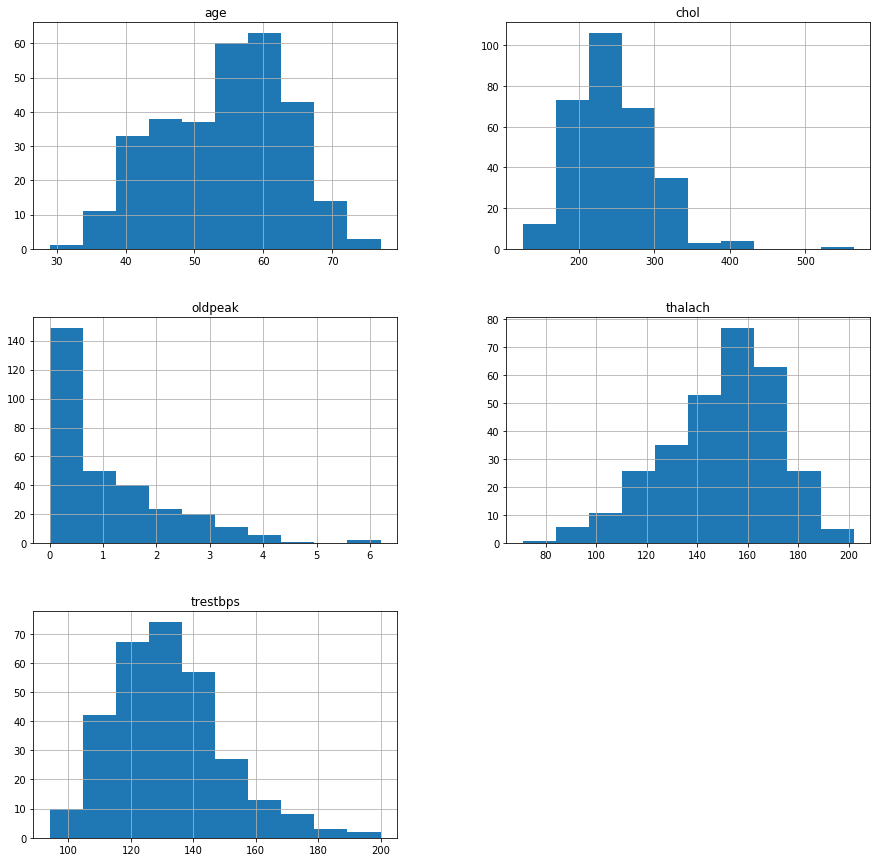

In [12]:
heart.hist(figsize = (15,15));

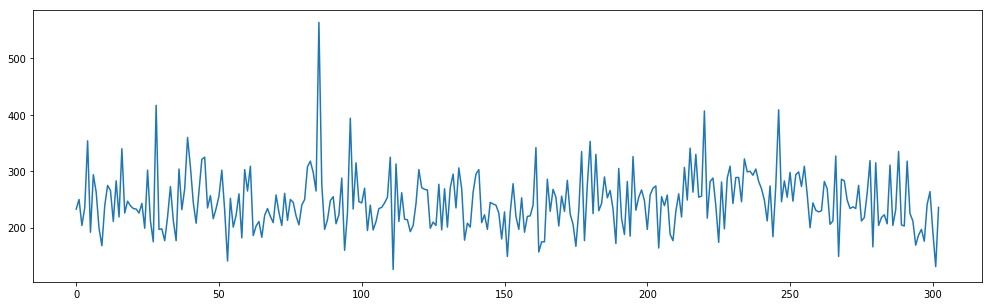

In [13]:
# As an example, generated a graph for "chol" to visualize the chol's data;
plt.figure(figsize=(17,5))
plt.plot(heart.chol);

It seems there is some noises in "chol".

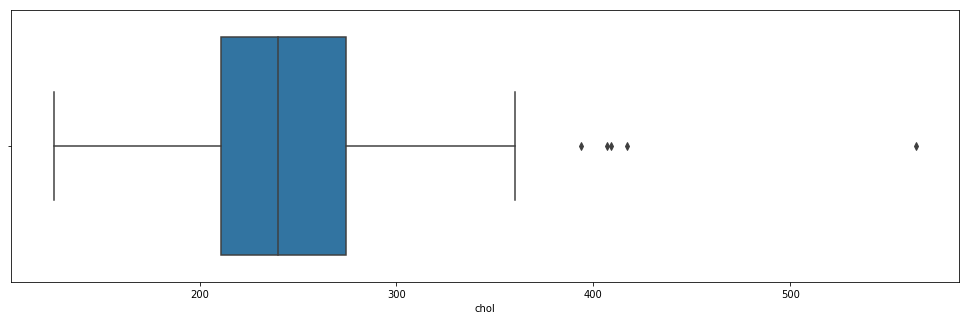

In [14]:
plt.figure(figsize=(17,5))
sb.boxplot(x = heart.chol, data = heart);

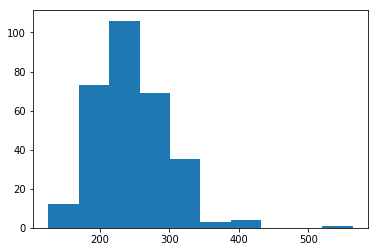

In [15]:
plt.hist(heart.chol);

In [16]:
#User Defined Function to remove outliers from numerical columns;
def outlier(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data = data.loc[-((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))),:]
    return data


for var2 in ['chol', 'trestbps', 'thalach', 'oldpeak']:
    heart = outlier(heart, var2)


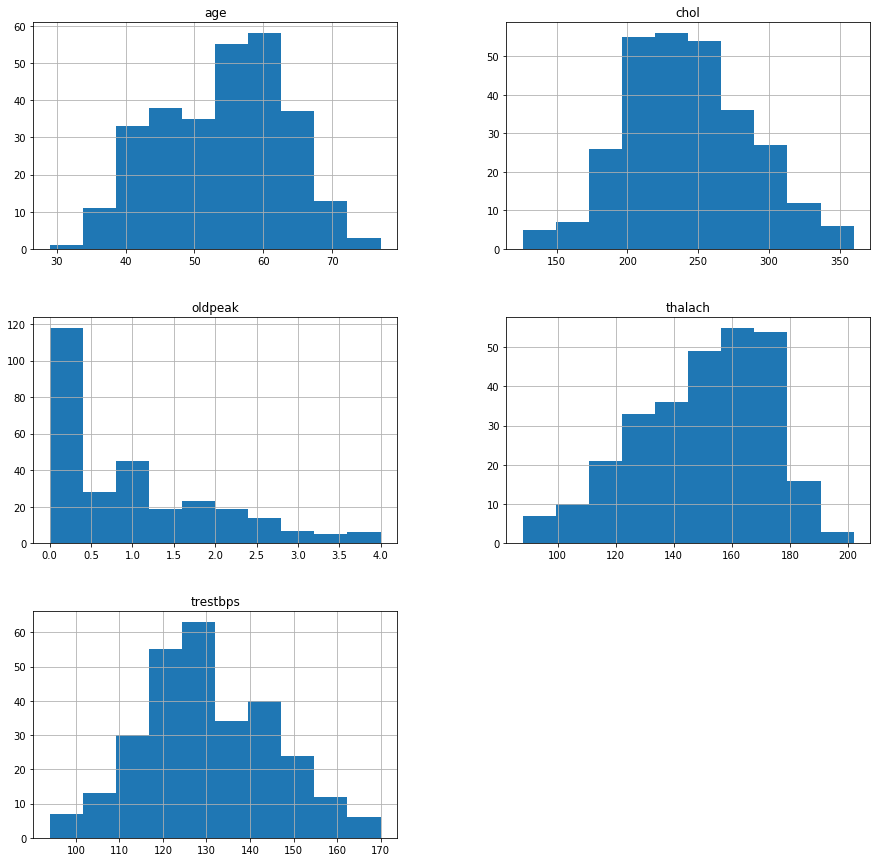

In [17]:
heart.hist(figsize = (15,15));

In [18]:
heart.shape

(284, 14)

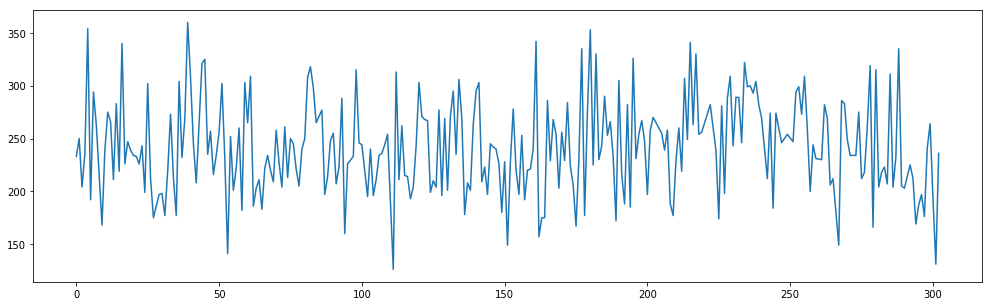

In [19]:
plt.figure(figsize=(17,5))
plt.plot(heart.chol);

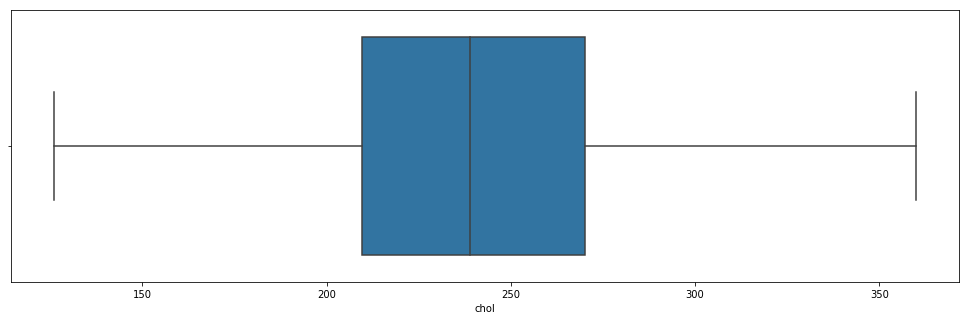

In [20]:
plt.figure(figsize=(17,5))
sb.boxplot(x = heart.chol, data = heart);

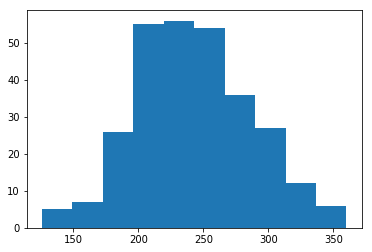

In [21]:
plt.hist(heart.chol);

The new histogram and boxplot graphs showe no more outliers in the data.

# Groupby

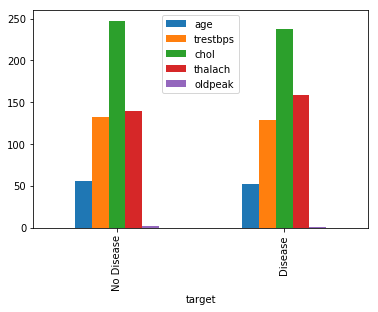

In [22]:
# groupby target and then view means to see average value for no disease vs. disease
heart.groupby(by=['target']).mean().plot.bar()
plt.xticks([0,1],["No Disease", "Disease"]);
plt.legend(loc =9);

There is no significant differences between mean of numerical variables of 2 groups of "Heart Disease" and "No Hear Disease".

In [23]:
heart.groupby(by=['target'])["age"].agg(["size", "min", "max", "mean", "median","std"])#({"age":"size","age":"mean"})

,size,min,max,mean,median,std
target,,,,,,
0,125,35,77,56.328000,58,8.145626
1,159,29,76,52.157233,52,9.516498


It seems samples with Heart Disease has lower age compare with No Heart Disease. We know our sampleing needs to be improved by collecing more data.

# Visualization

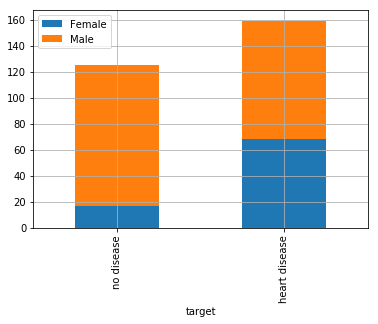

In [24]:
heart.groupby(by=["target","sex"]).size().reset_index().pivot(index= "target", columns="sex", values=0)\
                                  .plot.bar(stacked = True)
plt.xticks([0,1],["no disease","heart disease"])
plt.legend(["Female", "Male"]);
plt.grid()


It seems we have an unbalanced data set. 
The number of males is much higher than females. The solution will be collecting more data.

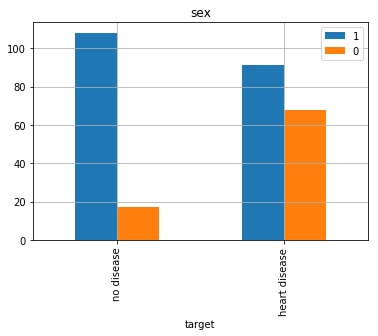

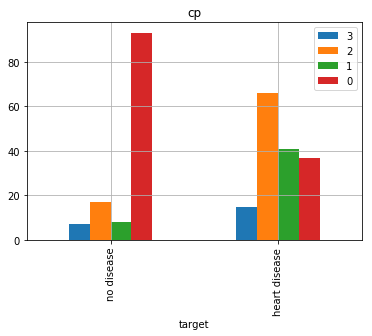

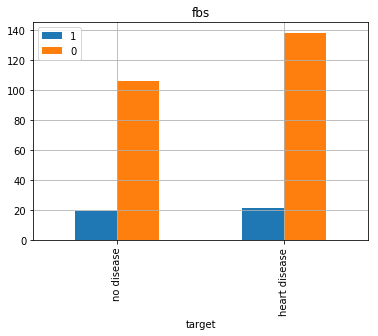

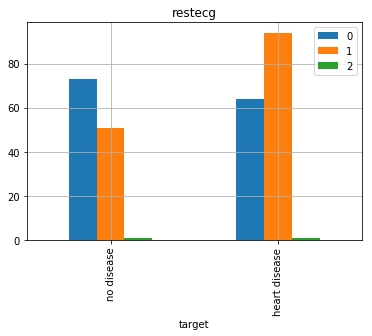

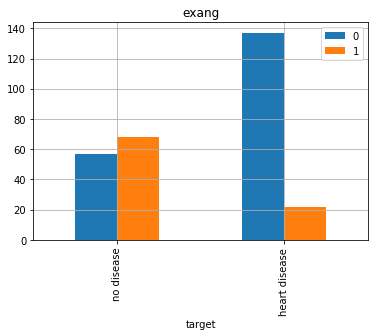

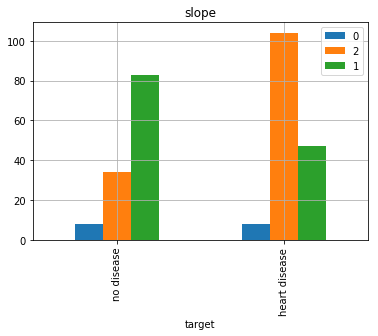

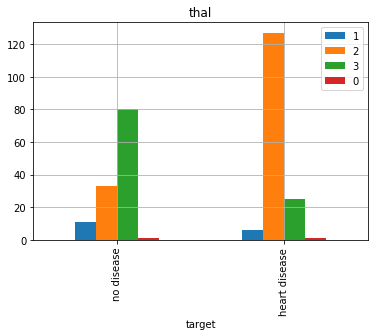

In [25]:
#bar graphs for each of the categorical variables
for var in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']:
    cols = {}
    for value in heart[var].unique(): 
        cols[value] = heart.loc[heart[var] == value].groupby(['target'])[var].count()
    x = pd.DataFrame(cols)
    x.plot.bar(title = var)
    plt.xticks([0,1],["no disease","heart disease"])
    plt.grid()

C:\Users\ShahabiD\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


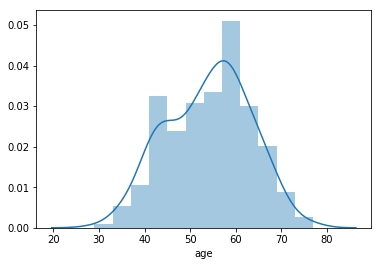

In [26]:
sb.distplot(heart.age);

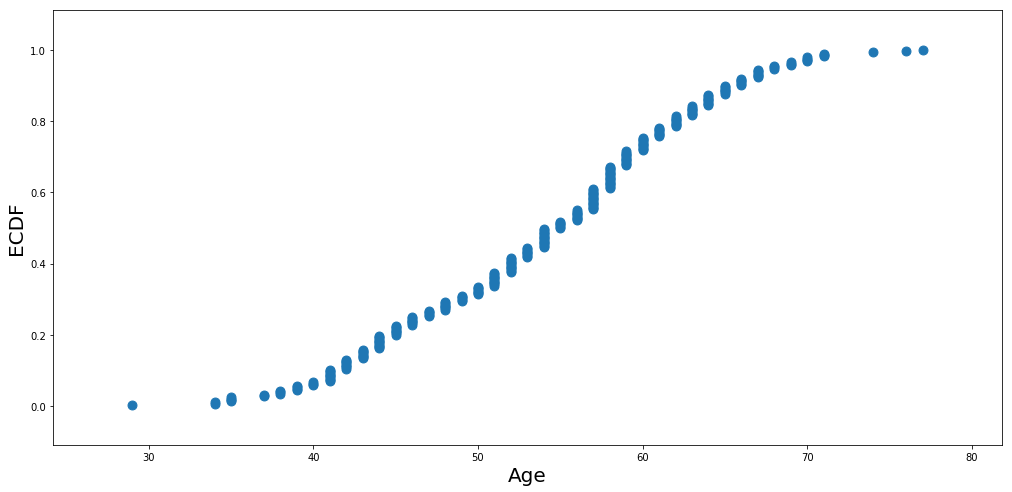

In [27]:
def ECDF(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    return x,y
x,y = ECDF(heart.age)

plt.figure(figsize=(17,8))
plt.scatter(x,y, s=80)
plt.margins(0.1)
plt.xlabel("Age", fontsize = 20 )
plt.ylabel("ECDF", fontsize = 20);

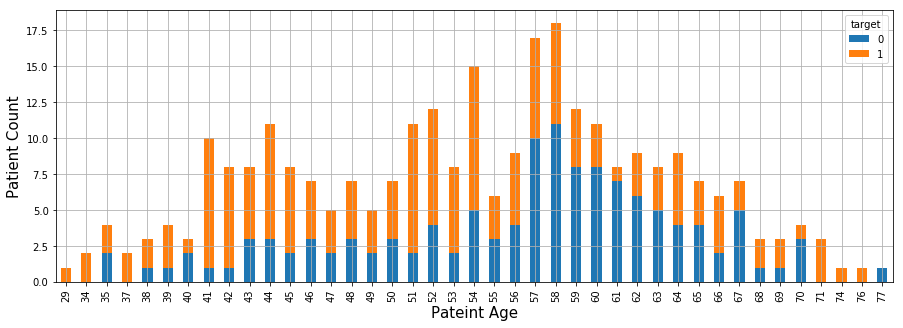

In [28]:
heart.groupby(by=["target", "age"]).size().reset_index()\
      .pivot(index="age", columns="target", values = 0).plot.bar(stacked=True, figsize=(15,5), grid=True)
plt.ylabel("Patient Count", fontsize = 15)
plt.xlabel("Pateint Age", fontsize = 15);

The data shows there is not a normally disterbuted data for patient ages.

# Empirical Distribution Function for "Age"

In [29]:
def ECDF(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    return x,y
x,y = ECDF(heart.chol)

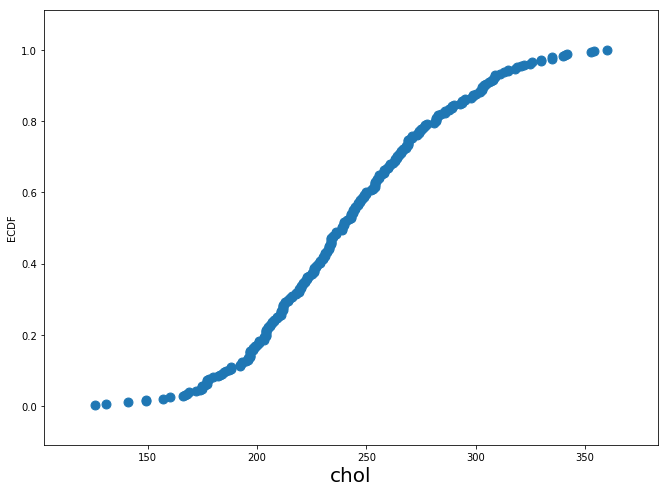

In [30]:
plt.figure(figsize=(11,8))
plt.scatter(x,y, s=80)
plt.margins(0.1)
plt.xlabel("chol", fontsize = 20 )
plt.ylabel("ECDF");

C:\Users\ShahabiD\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


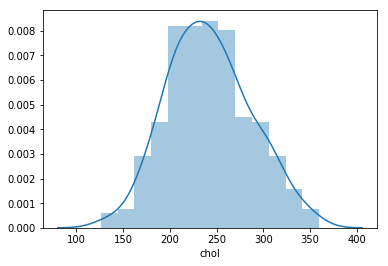

In [31]:
sb.distplot(heart.chol);

The data doe "chol", is slightly skewed to the left, but almost normally distributed.

# Correlation

In [32]:
heart.corr()

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.277741,0.178688,-0.414400,0.213528
trestbps,0.277741,1.000000,0.111825,-0.069547,0.142423
chol,0.178688,0.111825,1.000000,-0.025388,-0.004568
thalach,-0.414400,-0.069547,-0.025388,1.000000,-0.343370
oldpeak,0.213528,0.142423,-0.004568,-0.343370,1.000000


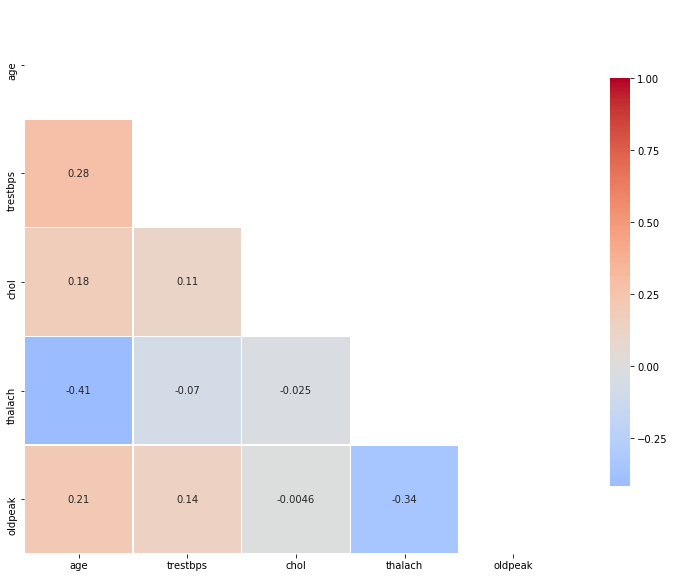

In [33]:
f, ax = plt.subplots(figsize=(15,10))
ax = sb.heatmap(heart.corr(),cmap="coolwarm", center=0, annot=True, square=True, linewidths=0.5, cbar_kws={"shrink":0.75}, mask=np.triu(heart.corr()))

There is no strong correlation between our numerical variables. However, it seems between "talach" and age & oldpeack there is a reletavely negetive correlation.


THALACH (maximum heart rate achieved)
OLDPEAK (ST depression induced by exercise relative to rest)

In [34]:
heart.to_csv(r'C:\Users\ShahabiD\Documents\Fianl Project CoderGirl\heart_prepared_Data.csv', index = False)